In [40]:
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join, splitext
import shutil
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd
%matplotlib inline


In [3]:
# generate test np
d = 2                           # dimension
nb = 100                      # database size
nq = 1                     # nb of queries
np.random.seed(1234)             # make reproducible

xb = np.random.random((nb, d)).astype('float32')
xb[:, 0] += np.arange(nb) / 1000.
xq = np.random.random((nq, d)).astype('float32')
xq[:, 0] += np.arange(nq) / 1000.

In [4]:
# check np shape
print('xb.shape', xb.shape)
print('xb[0]', xb[0])
print('xb[1]', xb[1])
print('xb[99]', xb[99])

xb.shape (100, 2)
xb[0] [0.19151945 0.62210876]
xb[1] [0.43872774 0.7853586 ]
xb[99] [0.90137416 0.94555324]


In [5]:
import faiss                   # make faiss available

index = faiss.IndexFlatL2(d)   # build the index
print('index.is_trained : ', index.is_trained)

index.add(xb)                  # add vectors to the index
print('index.ntotal : ', index.ntotal)

index.is_trained :  True
index.ntotal :  100


In [6]:
# check xb first 5
print('test check - xb[:5] : \n', xb[:5])

test check - xb[:5] : 
 [[0.19151945 0.62210876]
 [0.43872774 0.7853586 ]
 [0.7819758  0.2725926 ]
 [0.27946424 0.8018722 ]
 [0.96213937 0.87593263]]


In [7]:
k = 4                          # we want to see 4 nearest neighbors
D, I = index.search(xb[:5], k) # sanity check
print('I : ', I)
print('D : ', D)

I :  [[ 0 45 25 49]
 [ 1 88 13 93]
 [ 2 42 73 16]
 [ 3 96 87 37]
 [ 4 81 29 99]]
D :  [[5.9604645e-08 2.9202700e-03 3.2063723e-03 9.5323324e-03]
 [0.0000000e+00 4.8565865e-04 8.2504749e-04 3.2918453e-03]
 [0.0000000e+00 1.6224265e-02 1.7319322e-02 1.7904520e-02]
 [0.0000000e+00 4.3412447e-03 5.0160885e-03 9.7976923e-03]
 [0.0000000e+00 5.2456856e-03 7.7092648e-03 8.5396767e-03]]


In [8]:
D, I = index.search(xq, k)     # actual search
print('I[:5] : ', I[:5])                   # neighbors of the 5 first queries
print('I[-5:] : ', I[-5:])                  # neighbors of the 5 last queries

I[:5] :  [[ 4 81 29 84]]
I[-5:] :  [[ 4 81 29 84]]


In [9]:
xb[0]

array([0.19151945, 0.62210876], dtype=float32)

In [10]:
xq

array([[0.97903883, 0.88123226]], dtype=float32)

In [11]:
type(xq)

numpy.ndarray

In [12]:
xq.shape

(1, 2)

In [13]:
type(xb[0])

numpy.ndarray

# mnist image test

In [14]:
# mnist images test
from sklearn.datasets import load_digits
digits = load_digits()

In [89]:
# image np data
print("Image Data Shape" , digits.data.shape)

#print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)


In [90]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
def draw_mnist1(arr1):
    plt.figure(figsize=(4,4))
    for _, image in enumerate(zip(arr)):
        #plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

In [24]:
def draw_mnist5(arr):
    plt.figure(figsize=(20,4))
    for index, (image) in enumerate(zip(arr)):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)

In [18]:
# mnist indexing
d = 64                           # dimension
nb = 100                      # database size
nq = 10                     # nb of queries
#np.random.seed(1234)             # make reproducible
xb2 = digits.data.astype('float32')
#xb[:, 0] += np.arange(nb) / 1000.
xq2 = digits.data[0:1].astype('float32')
#xq[:, 0] += np.arange(nq) / 1000.

In [19]:
print('xb2.shape : ', xb2.shape, '\nxq2.shape : ', xq2.shape)

xb2.shape :  (1797, 64) 
xq2.shape :  (1, 64)


In [20]:
import faiss                   # make faiss available
index = faiss.IndexFlatL2(d)   # build the index
print('index.is_trained : ', index.is_trained)

index.add(xb2)                  # add vectors to the index
print('index.ntotal : ', index.ntotal)

index.is_trained :  True
index.ntotal :  1797


In [21]:
k = 5                          # we want to see 4 nearest neighbors
D, I = index.search(xq2, k)     # actual search
print('I[:5] : ', I[:k])                   # neighbors of the 5 first queries
print('D[:5] : ', D[:k])

I[:5] :  [[   0  877 1365 1541 1167]]
D[:5] :  [[  0. 120. 164. 172. 176.]]


In [22]:
arr = np.empty([0,64])
i = 0
for i in range(k):
    print('index : ', I[0,i], '\ndistance : ', D[0,i], '\narr : ', xb2[I[0,i]])
    arr = np.vstack((arr, xb2[I[0,i]]))
print('arr.shape : ', arr.shape)

index :  0 
distance :  0.0 
arr :  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
index :  877 
distance :  120.0 
arr :  [ 0.  0.  7. 13.  8.  4.  0.  0.  0.  1. 15. 11.  9. 15.  2.  0.  0.  4.
 16.  6.  0.  8.  7.  0.  0.  4. 10.  0.  0.  7.  8.  0.  0.  4. 10.  0.
  0.  8.  8.  0.  0.  5. 12.  0.  0. 12.  5.  0.  0.  3. 15.  5.  9. 14.
  2.  0.  0.  0.  8. 14. 12.  3.  0.  0.]
index :  1365 
distance :  164.0 
arr :  [ 0.  0.  5. 13. 11.  1.  0.  0.  0.  3. 16. 11.  8. 12.  0.  0.  0.  5.
 16.  0.  0. 13.  3.  0.  0.  5. 13.  0.  0.  6.  7.  0.  0.  7. 10.  0.
  0.  8.  7.  0.  0.  4. 13.  0.  1. 14.  5.  0.  0.  1. 15.  5. 12. 10.
  0.  0.  0.  0.  7. 16. 10.  1.  0.  0.]
index :  1541 
distance :  172.0 
arr :  [ 0.  0.  5. 12.  9.  1.  0.  0.  0.  0. 14. 14. 13. 13.  0

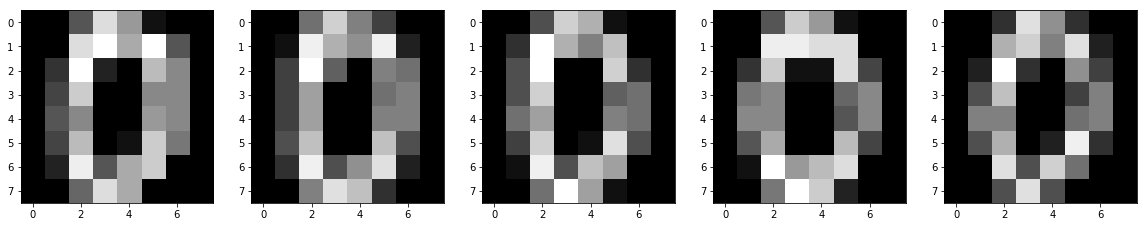

In [25]:
draw_mnist5(arr)

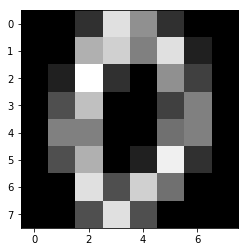

In [26]:
draw_mnist1(xq2)

# pg image test

im2arr.shape :  (128, 64, 3)
im2arrflat.shape :  (24576,)
reim2arr.shape :  (128, 64, 3)


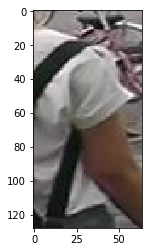

In [29]:
# image load, convert test
im = Image.open('data/00000000_00_0048.jpg')
im.show()
im2arr = np.array(im) # im2arr.shape: height x width x channel
print('im2arr.shape : ', im2arr.shape)
im2arrflat = im2arr.flatten()
print('im2arrflat.shape : ', im2arrflat.shape)
reim2arr = np.reshape(im2arrflat, (128, 64, 3)).astype(np.uint8)
print('reim2arr.shape : ', reim2arr.shape)
reim = Image.fromarray(reim2arr)
#print('reim.shape : ', reim.shape)
imshow(reim)

In [133]:
def load_image(imgfile_path):
    im = Image.open(imgfile_path)
    im2arr = np.array(im) # im2arr.shape: height x width x channel
    return im2arr.flatten()

In [135]:
image_folder = 'data'
arr = np.empty([0,24576]) # dim : 64*128*3

In [136]:
%time
for f in listdir(image_folder):
    arr = np.vstack((arr, load_image(join(image_folder, f))))
arr.shape
# load only 200 images for testing

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 µs


(200, 24576)

In [137]:
# save np
np.save('pg_np_200.npy', arr)

In [ ]:
# load np
arr = np.load('pg_np_200.npy')

In [138]:
#image display
def disp_img(arr1):
    print(arr1.shape)
    imgarr = np.reshape(arr1, (128, 64, 3)).astype(np.uint8)
    print(imgarr.shape)
    imshow(Image.fromarray(imgarr))

In [139]:
# map index dataset
xb3 = arr.astype('float32')

In [140]:
xb3.shape

(200, 24576)

In [141]:
xq3 = xb3[0:1]

In [142]:
xq3.shape

(1, 24576)

In [143]:
import faiss                   # make faiss available

d = 24576
index = faiss.IndexFlatL2(d)   # build the index
print('index.is_trained : ', index.is_trained)

index.add(xb3)                  # add vectors to the index
print('index.ntotal : ', index.ntotal)

index.is_trained :  True
index.ntotal :  200


In [145]:
k = 5                          # we want to see 4 nearest neighbors
D, I = index.search(xq3, k)     # actual search
print('I[:5] : ', I[:k])                   # neighbors of the 5 first queries
print('D[:5] : ', D[:k])

I[:5] :  [[ 0 93 34 53 46]]
D[:5] :  [[       0. 26295764. 34301956. 35717010. 35964840.]]


In [146]:
arr_result = np.empty([0,24576])
i = 0
for i in range(k):
    print('index : ', I[0,i], '\ndistance : ', D[0,i], '\narr : ', xb3[I[0,i]])
    arr_result = np.vstack((arr_result, xb3[I[0,i]]))
arr_result

index :  0 
distance :  0.0 
arr :  [70. 71. 65. ... 61. 37. 25.]
index :  93 
distance :  26295764.0 
arr :  [111. 102. 105. ...  64.  40.  36.]
index :  34 
distance :  34301956.0 
arr :  [51. 50. 45. ... 38. 29. 32.]
index :  53 
distance :  35717010.0 
arr :  [ 82.  82.  80. ... 114.  55.  57.]
index :  46 
distance :  35964840.0 
arr :  [128. 119. 122. ...  63.  34.  54.]


array([[ 70.,  71.,  65., ...,  61.,  37.,  25.],
       [111., 102., 105., ...,  64.,  40.,  36.],
       [ 51.,  50.,  45., ...,  38.,  29.,  32.],
       [ 82.,  82.,  80., ..., 114.,  55.,  57.],
       [128., 119., 122., ...,  63.,  34.,  54.]])

In [147]:
arr_result.shape

(5, 24576)

In [148]:
def draw_image5(arr_result):
    plt.figure(figsize=(20,4))
    for index, (image) in enumerate(zip(arr_result)):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, (128, 64, 3)).astype(np.uint8))

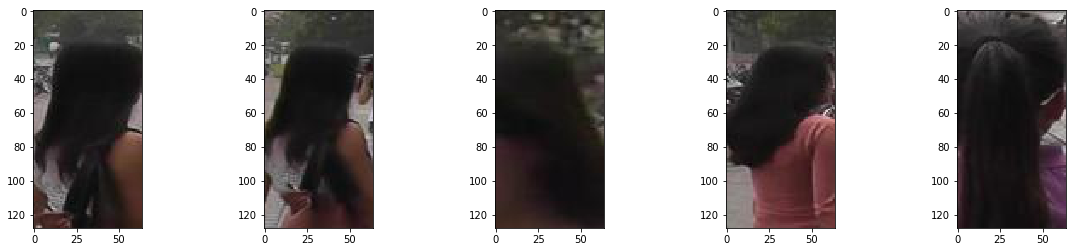

In [149]:
# display
draw_image5(arr_result)

# pg 512d vector processing

In [31]:
import os
folder = 'full-vector-data/512d_embedding'
image_folder = 'full-vector-data/images'
files = [file for file in os.listdir(folder) if os.path.isfile(join(folder, file))]

In [32]:
files[0:10]

['00001480_01_0001.txt',
 '00001312_01_0001.txt',
 '00000001_04_0000.txt',
 '00001403_00_0005.txt',
 '00001308_02_0003.txt',
 '00000307_05_0009.txt',
 '00001219_02_0000.txt',
 '00000227_05_0035.txt',
 '00001096_02_0001.txt',
 '00001386_02_0001.txt']

In [78]:
%time

# arr_with_filename = np.empty([0,513])  # 513 - last array value = filename
i = 0
# http://chrisschell.de/2018/02/01/how-to-efficiently-deal-with-huge-Numpy-arrays.html
arr_with_filename=np.empty((len(files),513), dtype=np.object)

for f in files:
#     vector1 = np.genfromtxt(join(folder, f), delimiter="\r\n")
    vector1 = np.loadtxt(join(folder, f), delimiter="\r\n")
#     vector1 = pd.read_csv(join(folder, f), sep="\n", header=None)
    filename = [splitext(f)[0]]
#     print(filename)
    vector1_with_filename = np.concatenate((vector1,filename), axis=0)
    arr_with_filename[i] = vector1_with_filename
#     arr_with_filename = np.vstack((arr_with_filename, vector1_with_filename))
    i = i + 1
arr_with_filename.shape

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.15 µs


(32217, 513)

In [79]:
# check filename
arr_with_filename[0]

array(['0.05662751', '2.533811', '1.0725495', '0.016723929', '0.2981341',
       '1.3810831', '1.3326769', '3.963318', '1.5067302', '0.40757823',
       '1.3891331', '1.4373819', '0.67315876', '0.0', '0.35885268',
       '0.8673534', '0.2701697', '0.05562486', '0.4862823', '1.2151344',
       '0.8801378', '0.78363144', '0.6542226', '1.0556991', '0.305339',
       '0.33160734', '1.8136027', '2.136743', '0.1481087', '1.2612246',
       '0.2091731', '0.07680841', '0.80183536', '1.7743828', '0.63013995',
       '0.39670017', '2.954616', '0.12623955', '1.1365873', '3.1498954',
       '1.4333363', '3.043444', '0.72961766', '1.2671843', '0.019562047',
       '0.5814583', '1.7934797', '0.052723486', '0.12868127',
       '0.96228635', '1.264252', '0.37483314', '0.6797939', '0.25123277',
       '0.4096973', '1.4008398', '0.90634584', '0.25969228', '1.6670812',
       '0.12344561', '0.7877698', '0.43315676', '3.1810079', '0.87359565',
       '0.64299095', '1.1324813', '1.4454956', '1.558534', '0.

In [80]:
# create work array without filename
arr = arr_with_filename[:,:512]

In [81]:
arr.shape

(32217, 512)

In [82]:
arr[0]

array(['0.05662751', '2.533811', '1.0725495', '0.016723929', '0.2981341',
       '1.3810831', '1.3326769', '3.963318', '1.5067302', '0.40757823',
       '1.3891331', '1.4373819', '0.67315876', '0.0', '0.35885268',
       '0.8673534', '0.2701697', '0.05562486', '0.4862823', '1.2151344',
       '0.8801378', '0.78363144', '0.6542226', '1.0556991', '0.305339',
       '0.33160734', '1.8136027', '2.136743', '0.1481087', '1.2612246',
       '0.2091731', '0.07680841', '0.80183536', '1.7743828', '0.63013995',
       '0.39670017', '2.954616', '0.12623955', '1.1365873', '3.1498954',
       '1.4333363', '3.043444', '0.72961766', '1.2671843', '0.019562047',
       '0.5814583', '1.7934797', '0.052723486', '0.12868127',
       '0.96228635', '1.264252', '0.37483314', '0.6797939', '0.25123277',
       '0.4096973', '1.4008398', '0.90634584', '0.25969228', '1.6670812',
       '0.12344561', '0.7877698', '0.43315676', '3.1810079', '0.87359565',
       '0.64299095', '1.1324813', '1.4454956', '1.558534', '0.

In [83]:
# save np
# np.save('pg_np_512d_vector_500.npy', arr)
# np.save('pg_np_512d_vector_500_with_filename.npy', arr_with_filename)

np.save('pg_np_512d_vector_32000.npy', arr)
np.save('pg_np_512d_vector_32000_with_filename.npy', arr_with_filename)

In [84]:
# load np
arr = np.load('pg_np_512d_vector_32000.npy')
arr_with_filename = np.load('pg_np_512d_vector_32000_with_filename.npy')

In [85]:
xb4 = arr.astype('float32')

In [103]:
xq4 = xb4[200:201]  # set query vector

In [104]:
print('xb4.shape : ',xb4.shape)
print('xq4.shape', xq4.shape)

xb4.shape :  (32217, 512)
xq4.shape (1, 512)


In [105]:
import faiss                   # make faiss available

d = 512
index = faiss.IndexFlatL2(d)   # build the index
print('index.is_trained : ', index.is_trained)

index.add(xb4)                  # add vectors to the index
print('index.ntotal : ', index.ntotal)

index.is_trained :  True
index.ntotal :  32217


In [106]:
k = 5                          # we want to see 4 nearest neighbors
D, I = index.search(xq4, k)     # actual search
print('I[:5] : ', I[:k])                   # neighbors of the 5 first queries
print('D[:5] : ', D[:k])

I[:5] :  [[  200  4260   423  3652 14986]]
D[:5] :  [[  0.      195.64238 198.66382 200.81802 204.67073]]


In [107]:
arr_result = np.empty([0,512])
i = 0
for i in range(k):
    print('index : ', I[0,i], '\ndistance : ', D[0,i], '\narr : ', xb4[I[0,i]])
    arr_result = np.vstack((arr_result, xb4[I[0,i]]))
arr_result

index :  200 
distance :  0.0 
arr :  [4.37541977e-02 1.67885184e+00 2.59796232e-01 4.49258149e-01
 1.14842258e-01 1.91102278e+00 1.26194119e+00 1.76878929e+00
 1.32841611e+00 2.87987024e-01 6.84721649e-01 4.79449064e-01
 4.47912961e-01 5.15974201e-02 1.06095731e+00 6.13351166e-01
 2.01544926e-01 4.66120942e-03 7.71274686e-01 3.26729745e-01
 1.42386660e-01 1.16488242e+00 3.09497535e-01 9.63677347e-01
 4.74733680e-01 1.66463339e+00 2.78207380e-02 2.36162567e+00
 8.30725506e-02 1.43986332e+00 1.49980366e+00 1.45559239e+00
 2.05126166e+00 1.28216004e+00 5.66901267e-01 5.46726525e-01
 9.15704846e-01 7.96717182e-02 3.20966154e-01 9.90229785e-01
 1.69182694e+00 9.35977459e-01 4.11292732e-01 5.78340888e-01
 2.10863280e+00 8.89800429e-01 4.50985521e-01 1.38435420e-03
 3.19588214e-01 1.90826619e+00 1.18569362e+00 4.27697241e-01
 2.07094148e-01 2.95664340e-01 2.04344854e-01 9.44869816e-01
 4.30133641e-01 5.60171485e-01 7.16521800e-01 3.58711243e-01
 1.31037101e-01 2.89710104e-01 7.73026764e-01 8

array([[0.0437542 , 1.67885184, 0.25979623, ..., 0.81161177, 0.20485468,
        1.59694648],
       [0.00723955, 2.04996371, 0.33408529, ..., 0.07577892, 0.3423619 ,
        1.5145961 ],
       [0.31955871, 2.09331036, 1.70044351, ..., 0.93137127, 0.53190172,
        0.18397637],
       [0.3978453 , 1.56416106, 0.17902495, ..., 0.94791073, 0.65288842,
        0.36745572],
       [0.05168912, 1.31054342, 0.56618917, ..., 0.58188808, 1.24061513,
        0.85255337]])

In [108]:
arr_result.shape

(5, 512)

In [109]:
I

array([[  200,  4260,   423,  3652, 14986]])

In [110]:
def get_map_image_filename(idx):
    #print(arr_with_filename[idx, -1])
    image_filename = arr_with_filename[idx, -1]
    image_filename = image_filename.astype('str') + '.jpg'
    return image_filename

def get_map_image_filename_stralready(idx):
    #print(arr_with_filename[idx, -1])
    image_filename = arr_with_filename[idx, -1]
    image_filename = image_filename + '.jpg'
    return image_filename

In [111]:
def draw_vector_map_image5(I):
    plt.figure(figsize=(20,4))
    #print('I[0]', I[0])
    for index, (array_index) in enumerate(zip(I[0])):
        #print('array_index', array_index)
        #print('index : ', index)
        #print('array_index[index] : ', array_index[0])
        fname = get_map_image_filename_stralready(array_index[0])
        #print('fname : ', fname)
        im = Image.open(join(image_folder, fname))
        plt.subplot(1, 5, index + 1)
        plt.imshow(im)
        titlestr = 'i:' + str(array_index[0]) + '  filename:', fname
        plt.title(titlestr, fontsize = 10)

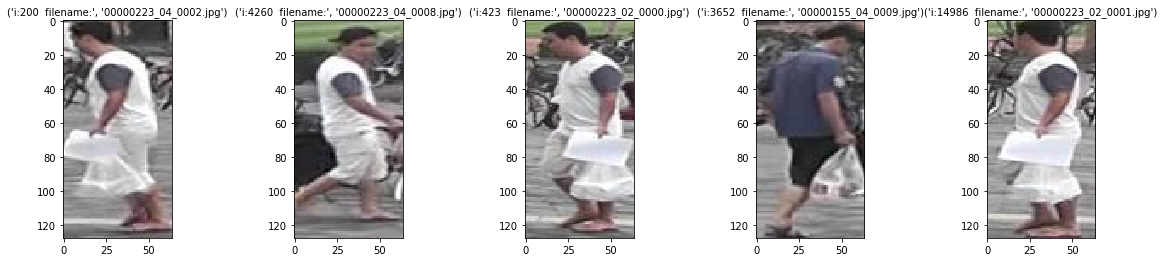

In [112]:
draw_vector_map_image5(I)

# pg 4096d vector processing

In [284]:
folder = 'vector-data/4096d_embedding'
image_folder = 'vector-data/images'
files = [file for file in os.listdir(folder) if os.path.isfile(join(folder, file))]

In [285]:
arr_with_filename = np.empty([0,4097])  # 4097 - last array value = filename
i = 0
for f in files:
    vector1 = np.genfromtxt(join(folder, f), delimiter="\r\n")
    filename = [splitext(f)[0]]
    #print(filename)
    vector1_with_filename = np.concatenate((vector1,filename), axis=0)
    arr_with_filename = np.vstack((arr_with_filename, vector1_with_filename))
    i = i + 1
arr_with_filename.shape

(500, 4097)

In [286]:
# create work array without filename
arr = arr_with_filename[:500, :4096]

In [287]:
# save np
np.save('pg_np_512d_vector_4096.npy', arr)
np.save('pg_np_512d_vector_4096_with_filename.npy', arr_with_filename)

In [288]:
xb5 = arr.astype('float32')

In [289]:
xq5 = xb5[200:201]  # set query vector

In [290]:
import faiss                   # make faiss available

d = 4096
index = faiss.IndexFlatL2(d)   # build the index
print('index.is_trained : ', index.is_trained)

index.add(xb5)                  # add vectors to the index
print('index.ntotal : ', index.ntotal)

index.is_trained :  True
index.ntotal :  500


In [291]:
k = 5                          # we want to see 4 nearest neighbors
D, I = index.search(xq5, k)     # actual search
print('I[:5] : ', I[:k])                   # neighbors of the 5 first queries
print('D[:5] : ', D[:k])

I[:5] :  [[200  64 384  61 104]]
D[:5] :  [[   0.     1338.2471 1360.1334 1403.5305 1417.8575]]


In [292]:
arr_result = np.empty([0,4096])
i = 0
for i in range(k):
    print('index : ', I[0,i], '\ndistance : ', D[0,i], '\narr : ', xb5[I[0,i]])
    arr_result = np.vstack((arr_result, xb5[I[0,i]]))
arr_result

index :  200 
distance :  0.0 
arr :  [0.02182986 2.8390937  0.         ... 0.         0.         0.        ]
index :  64 
distance :  1338.2471 
arr :  [0.13116044 0.         0.         ... 0.         0.         0.12926662]
index :  384 
distance :  1360.1334 
arr :  [0.       3.419318 0.       ... 0.       0.       0.      ]
index :  61 
distance :  1403.5305 
arr :  [0.         0.         0.         ... 0.         0.         0.02887804]
index :  104 
distance :  1417.8575 
arr :  [0.3223535 0.        0.        ... 0.        0.        0.       ]


array([[0.02182986, 2.83909369, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13116044, 0.        , 0.        , ..., 0.        , 0.        ,
        0.12926662],
       [0.        , 3.41931796, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02887804],
       [0.32235351, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

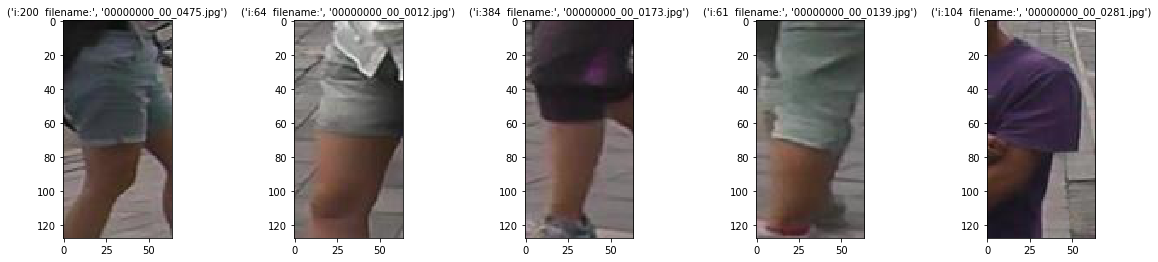

In [293]:
draw_vector_map_image5(I)